# Prediction of waiting time using R

In case you want to run R in Jupyter notebook: https://irkernel.github.io/installation/ (remember to type the commands in the R console)

In [1]:
require(randomForest)
set.seed(11)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [2]:
valpoc <- read.table("valpos.csv", header=TRUE, sep=",", stringsAsFactors=TRUE, quote = '"')
head(valpoc)

X      sex borough year_entry ref_from ref_to areaofcare wtime entryage  
1 139702 2   5601    2012       16       3      304        551   78.9083328
2    261 2   5101    2008       33       1      138        766   69.3944473
3 256217 1   5101    2013       21       1      115         39    0.9638889
4   7373 2   5101    2010        6       1      149          1    1.1222222
5  32944 2   5101    2010        6       1      138          2   83.2694473
6 499138 2   5101    2017        8       9       82         98   65.4416656

In [3]:
valpoc$X <- NULL

In [4]:
head(valpoc)

sex borough year_entry ref_from ref_to areaofcare wtime entryage  
1 2   5601    2012       16       3      304        551   78.9083328
2 2   5101    2008       33       1      138        766   69.3944473
3 1   5101    2013       21       1      115         39    0.9638889
4 2   5101    2010        6       1      149          1    1.1222222
5 2   5101    2010        6       1      138          2   83.2694473
6 2   5101    2017        8       9       82         98   65.4416656

In [5]:
valpoc = valpoc[complete.cases(valpoc), ]

In [6]:
#percentDataUsed=0.01
#nobs = nrow(valpoc)
#short=valpoc[sample(1:nobs,round(percentDataUsed*nobs)),]
#write.csv(short, file = "valpos.csv")

In [7]:
# I train with 75% of the data
valpoc$training=0 
valpoc$training[sample(1:nrow(valpoc),round(0.75*nrow(valpoc)))]=1

# I use optimised random forest: mtry=2 and ntrees=300

RF=randomForest(wtime~.,data=valpoc[valpoc$training==1,-length(valpoc)], importance=TRUE, ntree=300)

RF


Call:
 randomForest(formula = wtime ~ ., data = valpoc[valpoc$training ==      1, -length(valpoc)], importance = TRUE, ntree = 300) 
               Type of random forest: regression
                     Number of trees: 300
No. of variables tried at each split: 2

          Mean of squared residuals: 76910.86
                    % Var explained: 19.89

In [8]:
VIL = data.frame(RF$importance)
VIL <- VIL[order(VIL$X.IncMSE),]
VIL

X.IncMSE  IncNodePurity
sex         1259.524  8237060     
entryage    6825.509 69253962     
ref_from   13464.274 42618177     
borough    17590.824 20911597     
year_entry 35247.323 43662451     
ref_to     57149.206 19381669     
areaofcare 62277.914 64876284

In [9]:
hola = VIL$X.IncMSE/max(VIL$X.IncMSE)
hola

[1] 0.02022425 0.10959759 0.21619662 0.28245687 0.56596826 0.91764805 1.00000000

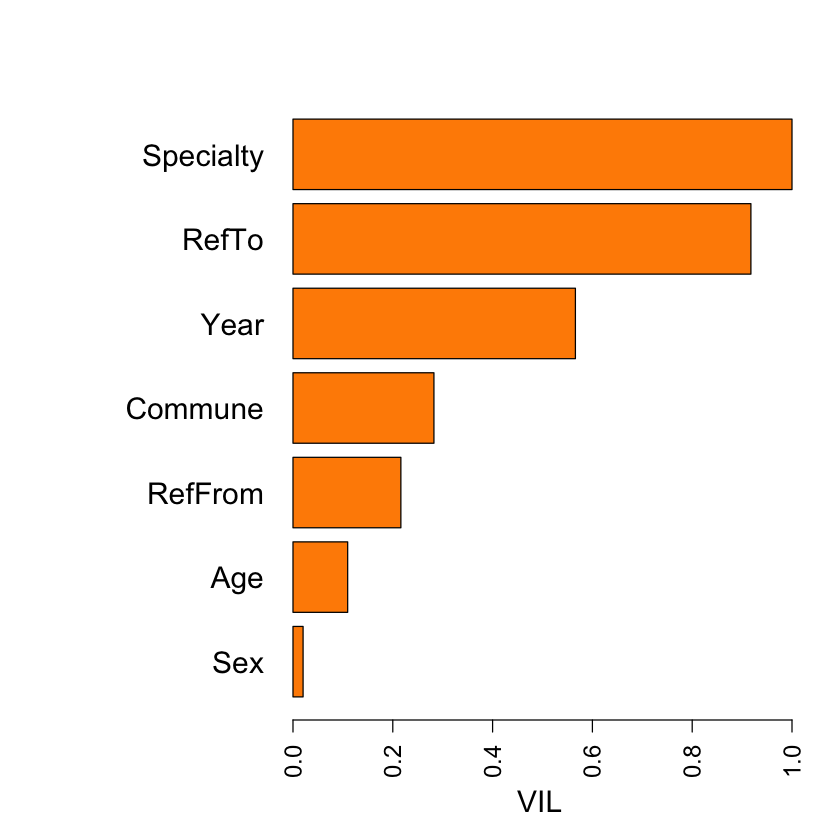

In [10]:
par(las=2)
par(mar=c(5,12,4,2))
barplot(hola, horiz=TRUE,xlab="VIL",
        names.arg=c("Sex", "Age","RefFrom","Commune","Year","RefTo","Specialty"),
        col="darkorange",cex.names=1.5,cex.axis=1.2,cex.lab=1.5)

In [12]:
# prediction
pred <- data.frame(predict(RF, valpoc[valpoc$training==0,]))
names(pred) <- "prediction"
pred$real = valpoc$wtime[valpoc$training==0]
pred$difference = pred$real-pred$prediction

# normalised root-mean-square error

RMSE=100*(sum((pred$real-pred$prediction)**2)/(sum(pred$real**2)))
RMSE


[1] 56.53056

In [13]:
mean(valpoc$wtime)


[1] 195.7955

In [18]:
example <- read.table("exampleWL.csv", header=TRUE, sep=",", stringsAsFactors=TRUE, quote = '"')

In [20]:
head(example)

X dateBirth  sex specialty                          entryDate  exitDate  
1 0 22/11/1985 2   Endodoncia                         31/12/2017           
2 1 01/02/1946 1   Periodoncia                        31/12/2017           
3 2 19/06/1937 2   Rehabilitación: Prótesis Removible 31/12/2017 03/01/2018
4 3 13/04/1955 2   Neurocirugía                       30/12/2017           
5 4 15/07/1997 2   Endodoncia                         30/12/2017           
6 5 22/08/2007 2   Dermatología                       29/12/2017           
  reason                                                                      
1 Celulitis y absceso de boca                                                 
2 Periodontitis cronica                                                       
3 Otras afecciones especificadas de los dientes y de sus estructuras de sosten
4 Trastornos de disco lumbar y otros, con radiculopatia                       
5 Celulitis y absceso de boca                                                 
6 Pitiriasis alba

In [21]:
percentDataUsed=0.01
nobs = nrow(example)
short=example[sample(1:nobs,round(percentDataUsed*nobs)),]


In [23]:
write.csv(short, file = "shortExampleWL.csv")